In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/AirPassengers.csv')

In [3]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Month'])
df['y'] = data['#Passengers']

In [4]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=12 * 6, freq='M')
future.tail()

,ds
211,1966-07-31
212,1966-08-31
213,1966-09-30
214,1966-10-31
215,1966-11-30


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
211,1966-07-31,758.615283,728.428193,787.904171
212,1966-08-31,712.681357,680.638631,742.381708
213,1966-09-30,675.623229,647.403937,706.730409
214,1966-10-31,646.491769,616.175289,677.289248
215,1966-11-30,675.998400,646.765276,706.043325


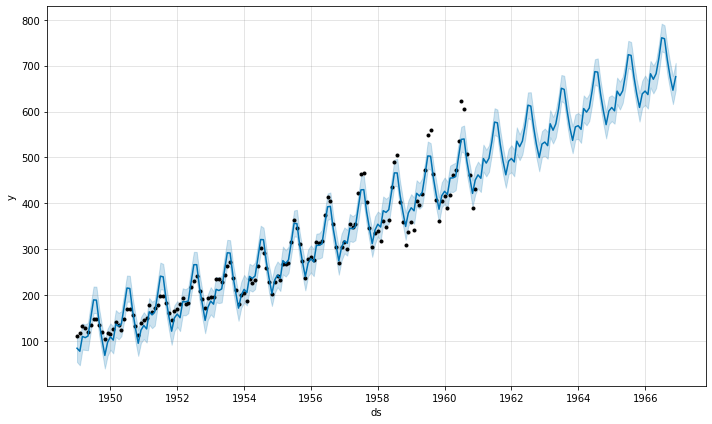

In [8]:
fig1 = m.plot(forecast)

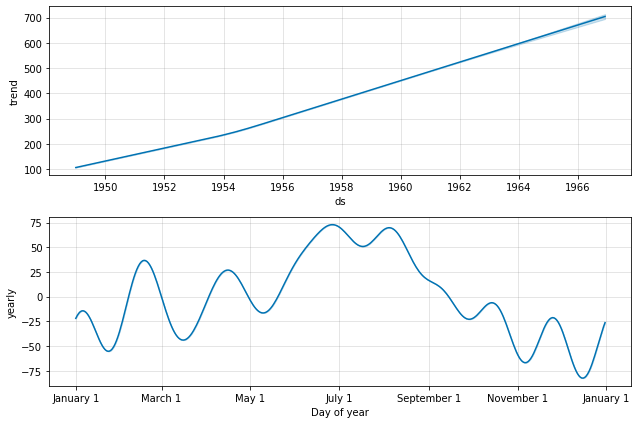

In [9]:
fig2 = m.plot_components(forecast)

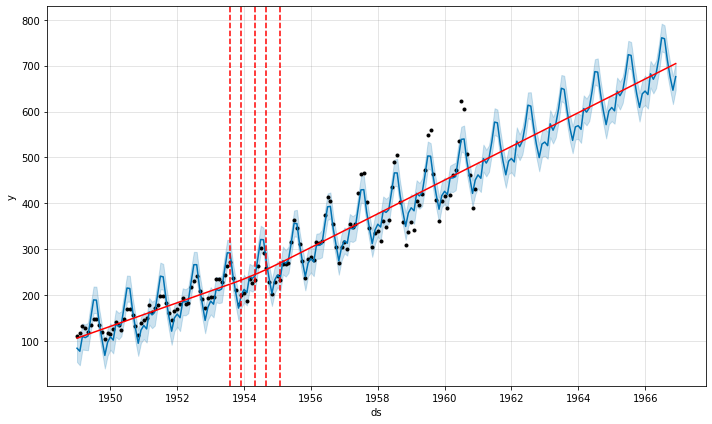

In [10]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


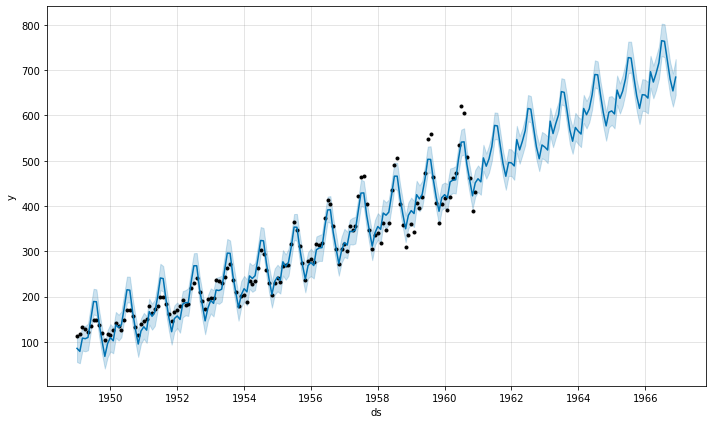

In [11]:
m = Prophet(n_changepoints=3).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(m.predict(future))

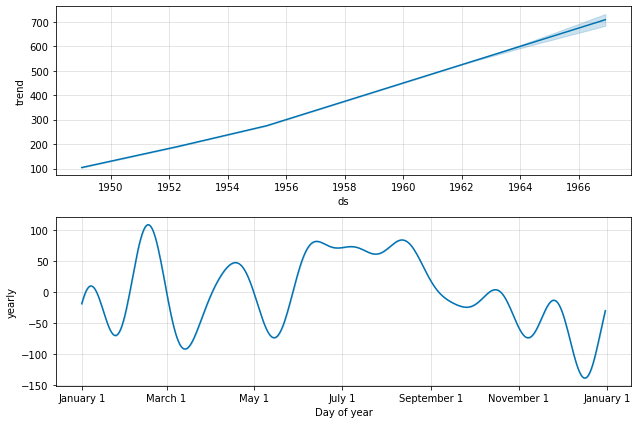

In [12]:
fig2 = m.plot_components(forecast)

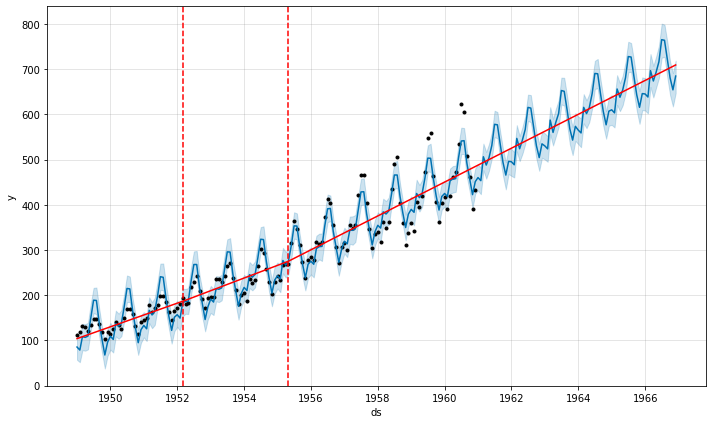

In [13]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


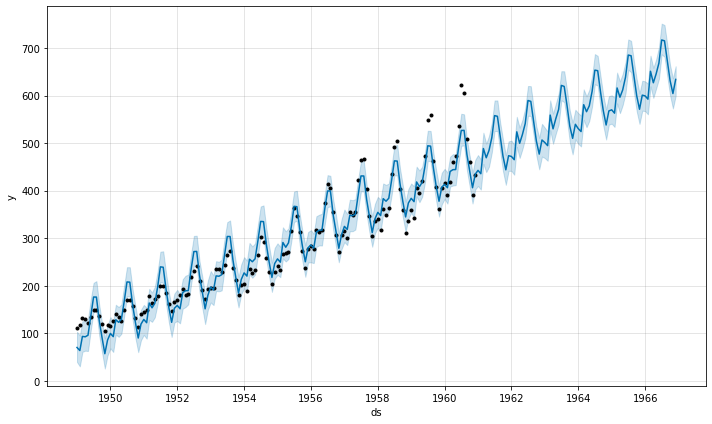

In [14]:
m = Prophet(changepoint_prior_scale=0.001).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


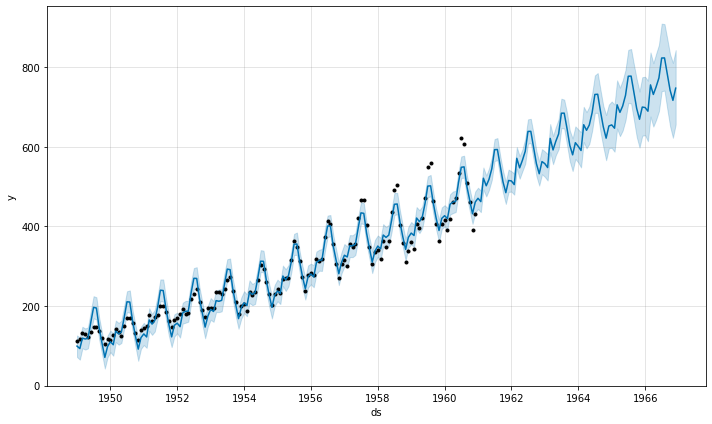

In [15]:
m = Prophet(changepoint_prior_scale=0.5).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


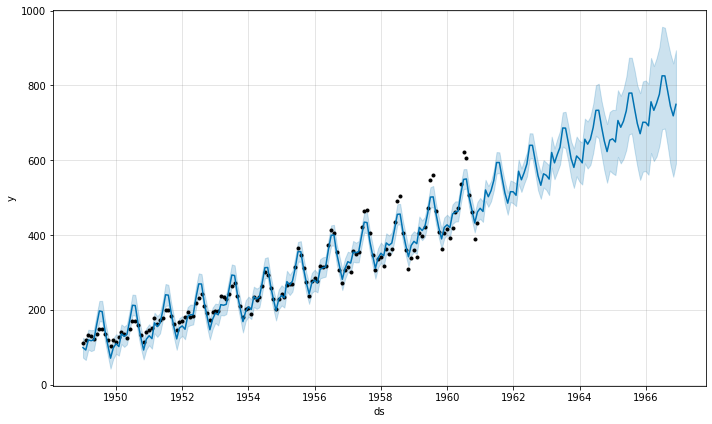

In [16]:
m = Prophet(changepoint_prior_scale=0.5, n_changepoints=7).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

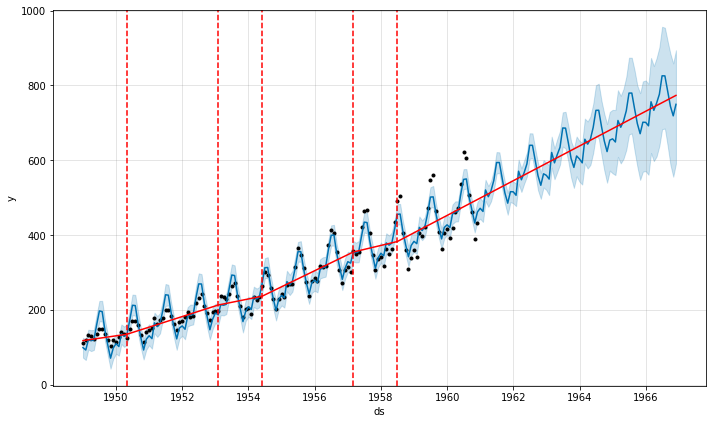

In [17]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [18]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,148.848759,147.406640,149.810704,150,1951-01-18
1,1951-03-01,154.011458,143.911467,162.050069,178,1951-01-18
2,1951-04-01,120.344078,95.846752,147.367695,163,1951-01-18
3,1951-05-01,121.284184,80.416532,168.666199,172,1951-01-18
4,1951-06-01,153.825151,92.708228,222.657389,178,1951-01-18


In [19]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,40 days,1088.003474,32.984898,26.088515,0.078211,0.227273
1,42 days,1056.926477,32.510406,26.118844,0.080477,0.181818
2,46 days,1028.798451,32.074888,26.163628,0.085125,0.181818
3,47 days,1160.235025,34.062223,28.556115,0.090011,0.181818
4,48 days,1143.642580,33.817785,28.001826,0.088296,0.181818


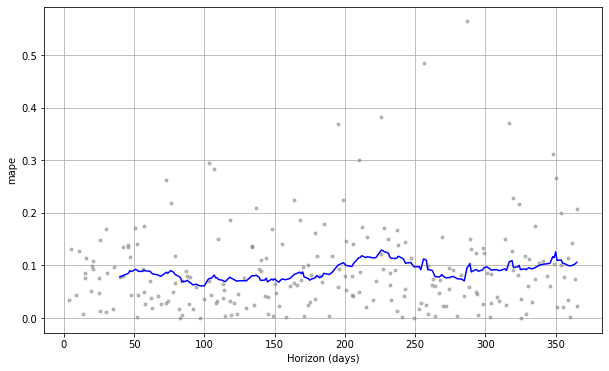

In [20]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


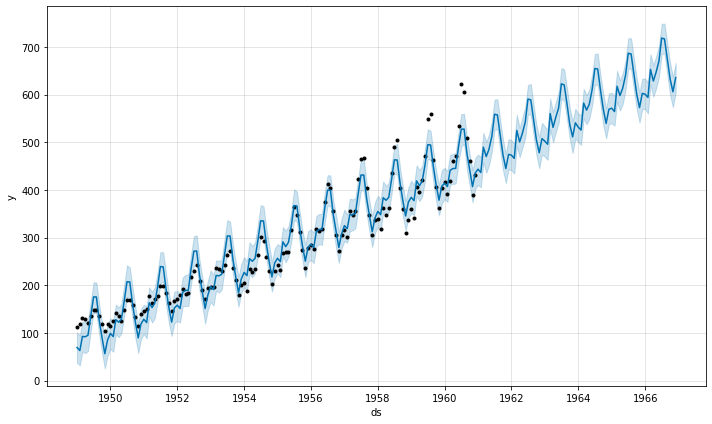

In [21]:
m = Prophet(changepoint_prior_scale=.001, n_changepoints=0).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 8


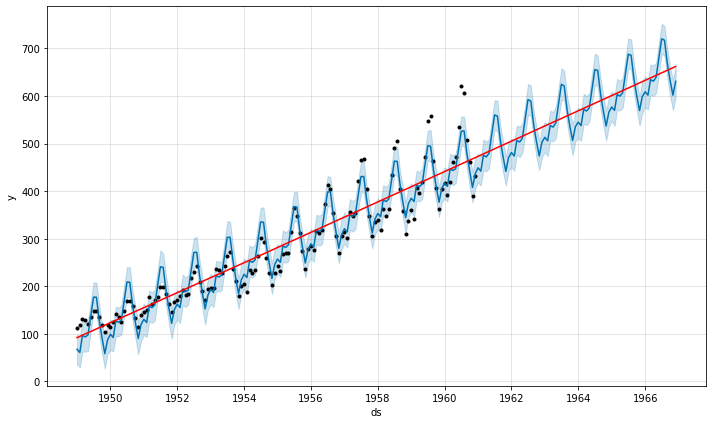

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


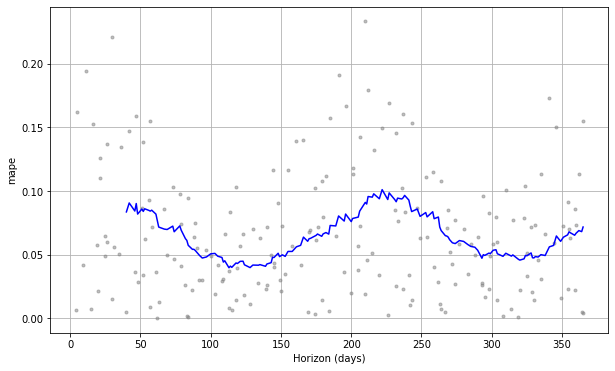

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 10


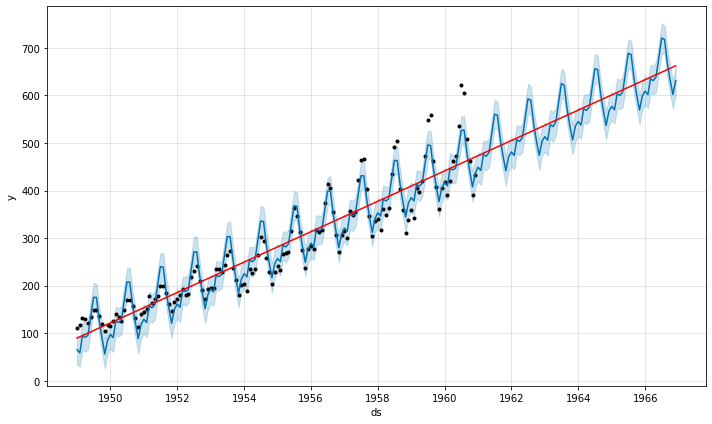

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


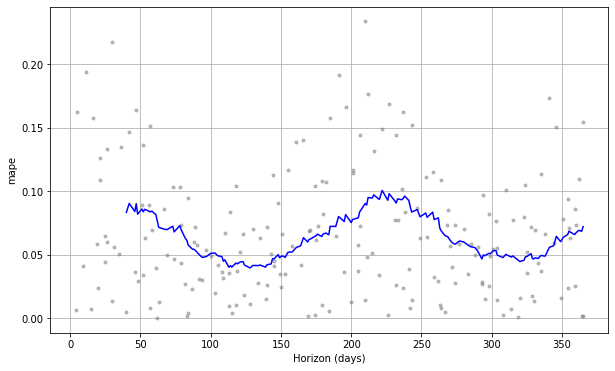

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 15


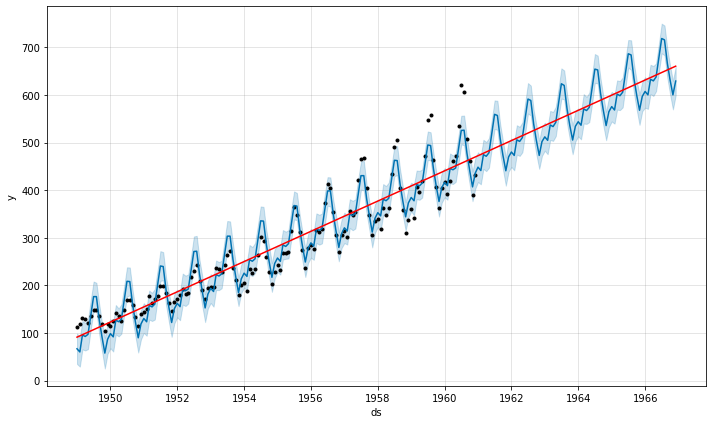

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


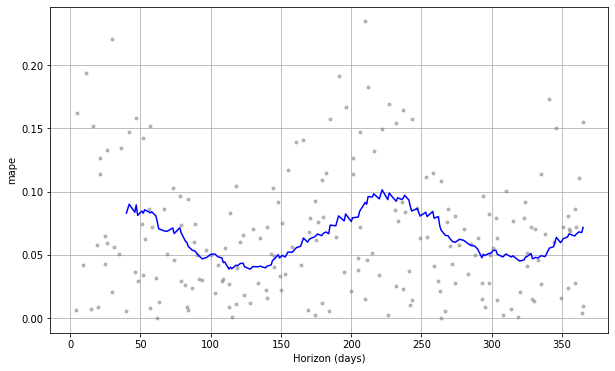

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 20


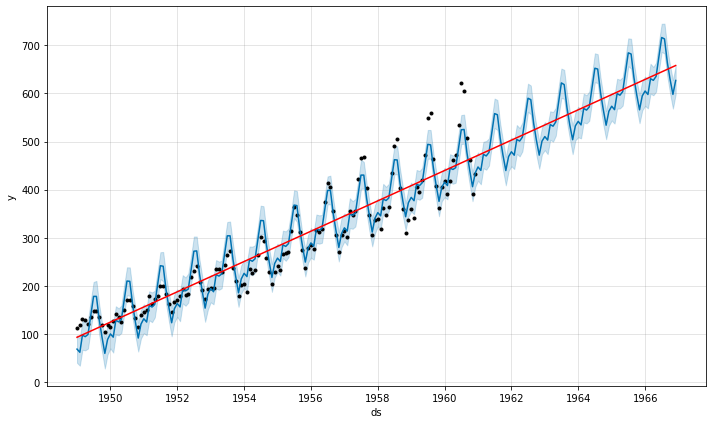

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


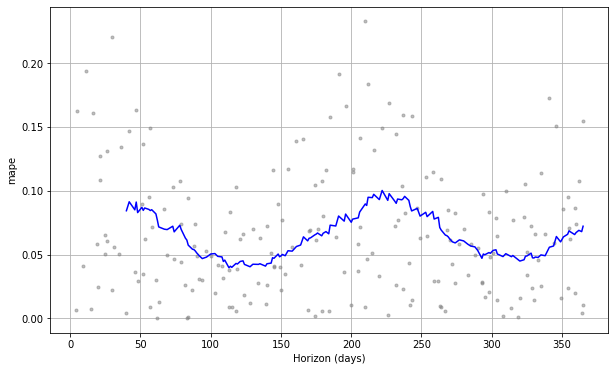

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 25


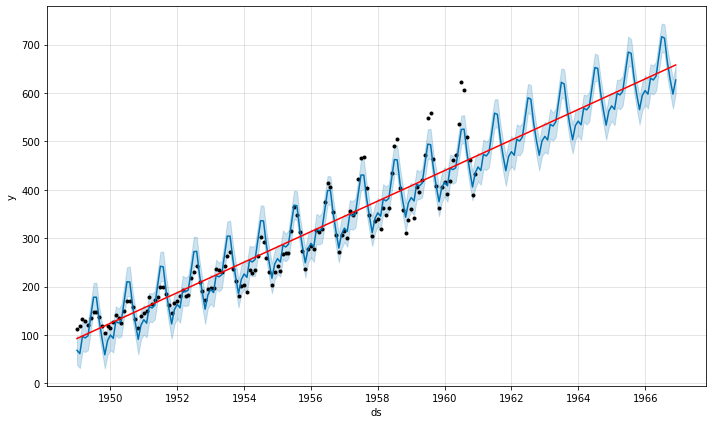

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


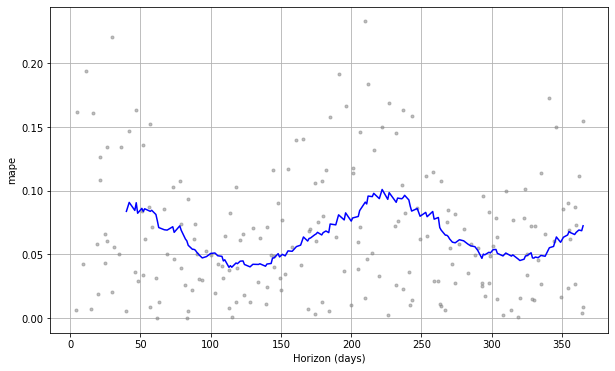

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 8


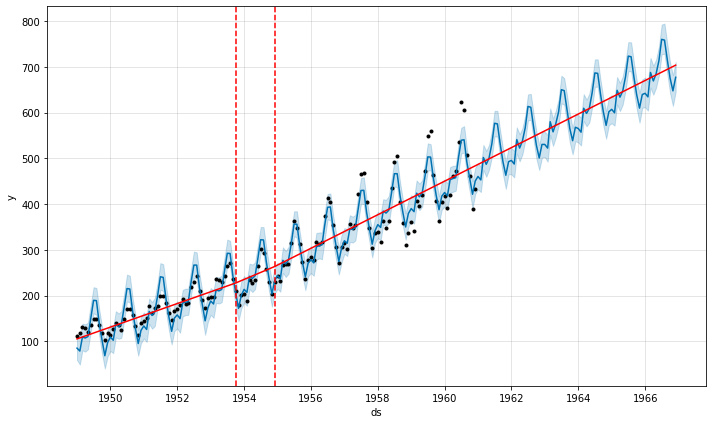

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


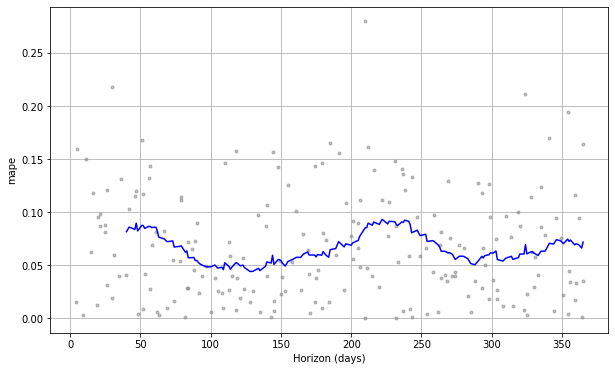

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 10


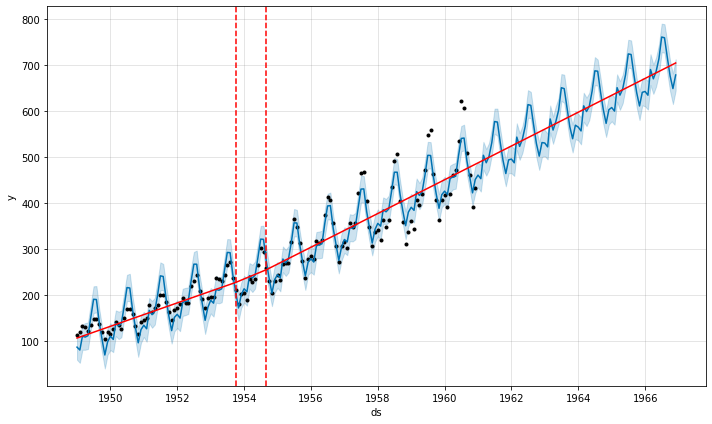

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


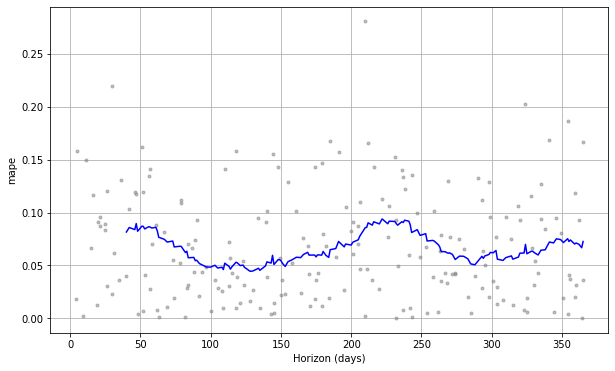

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 15


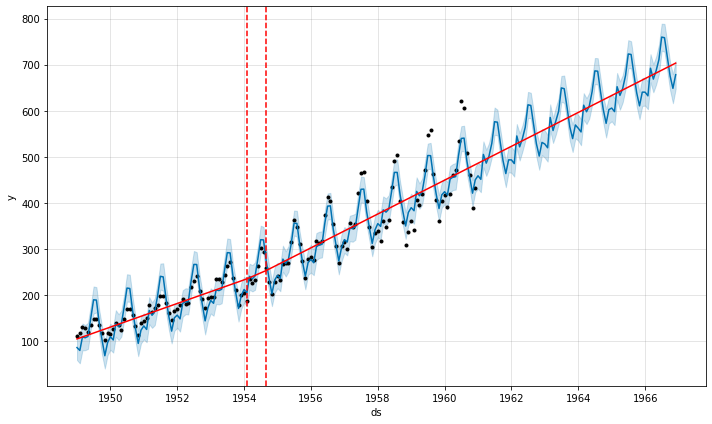

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


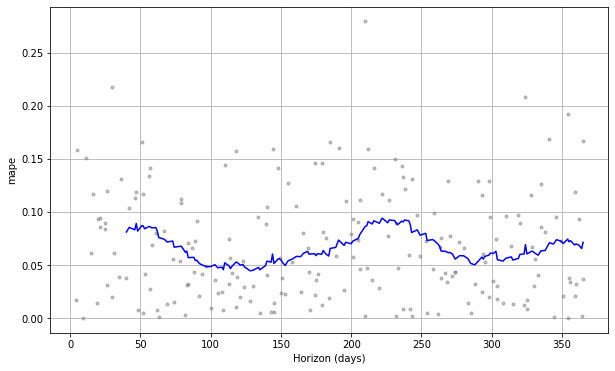

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 20


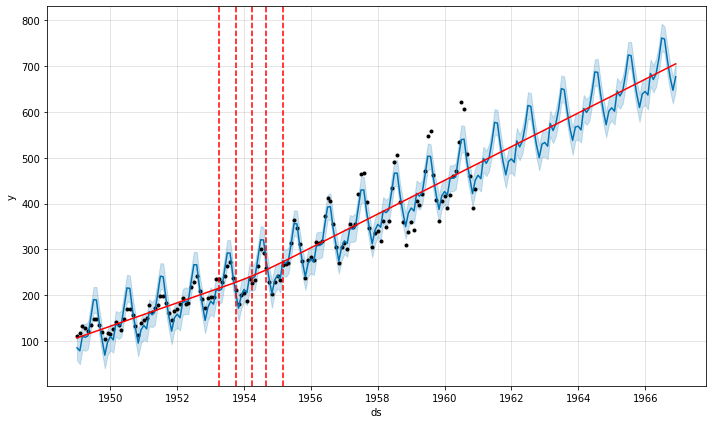

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


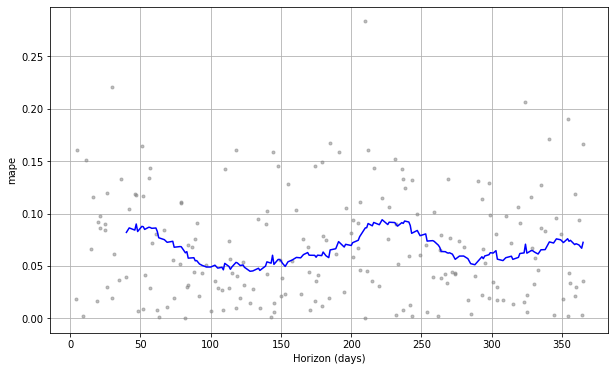

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 25


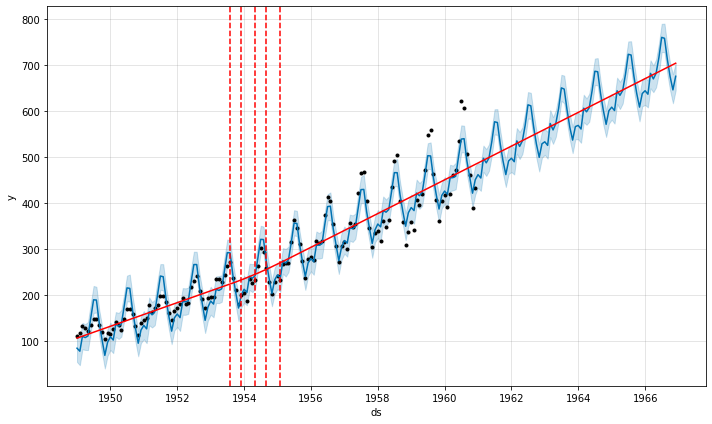

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


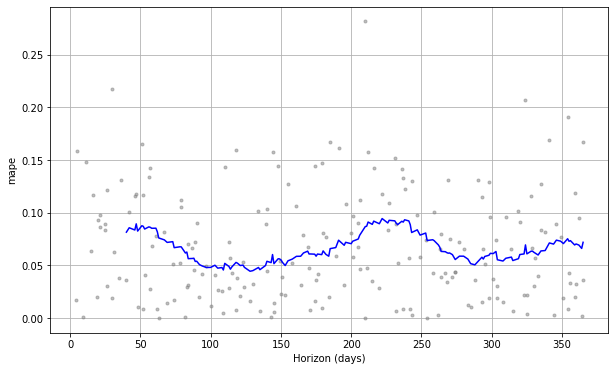

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 8


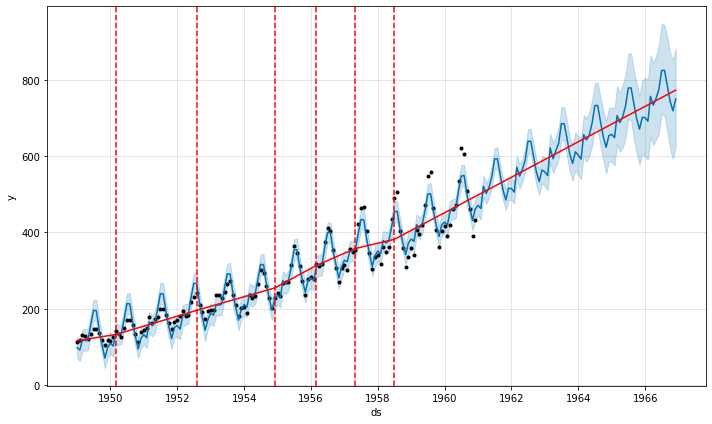

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


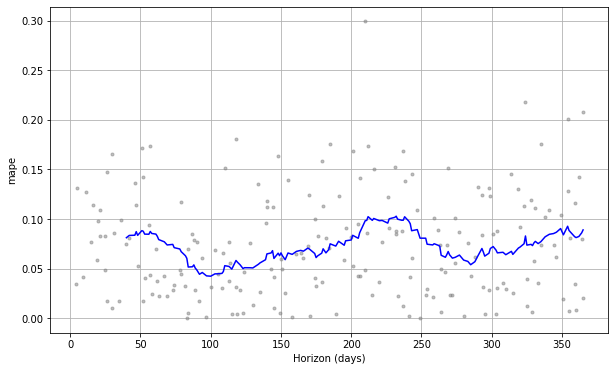

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 10


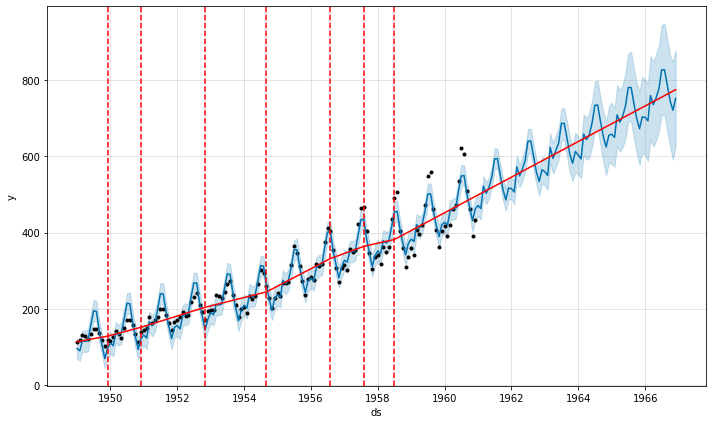

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


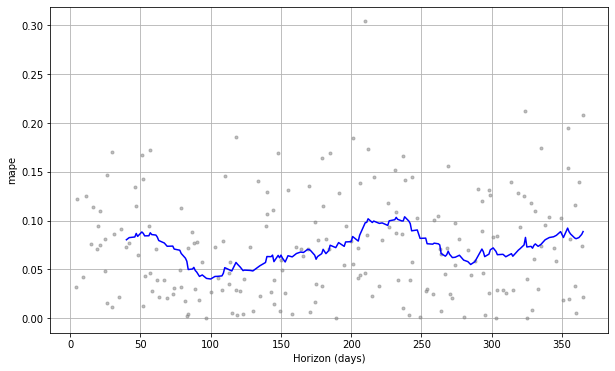

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 15


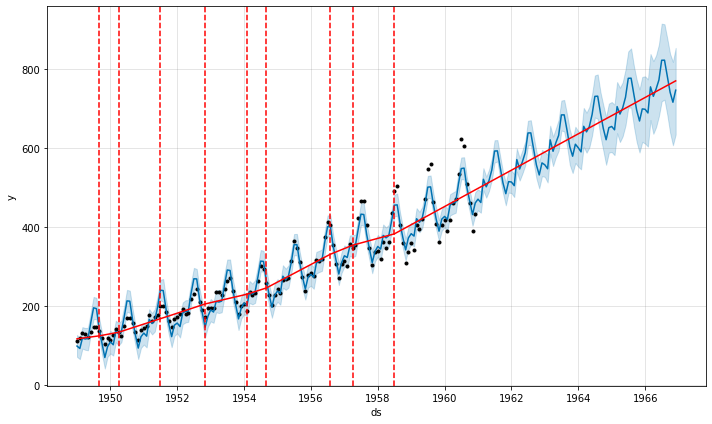

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


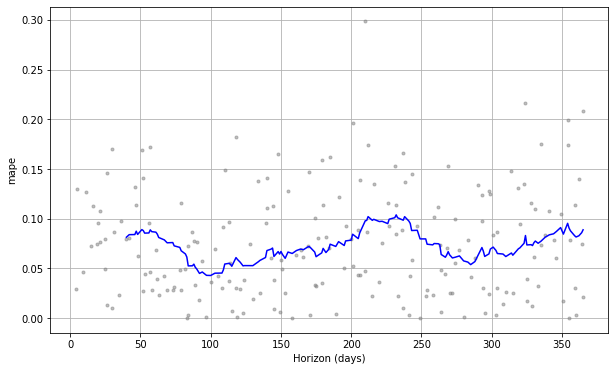

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 20


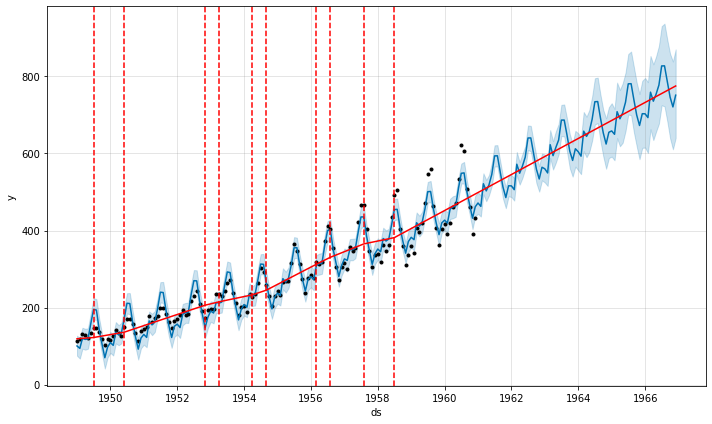

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


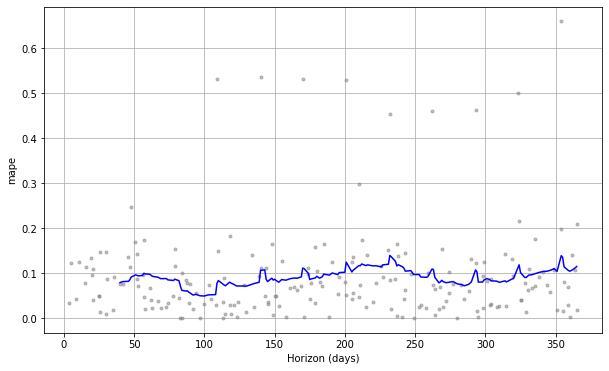

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 25


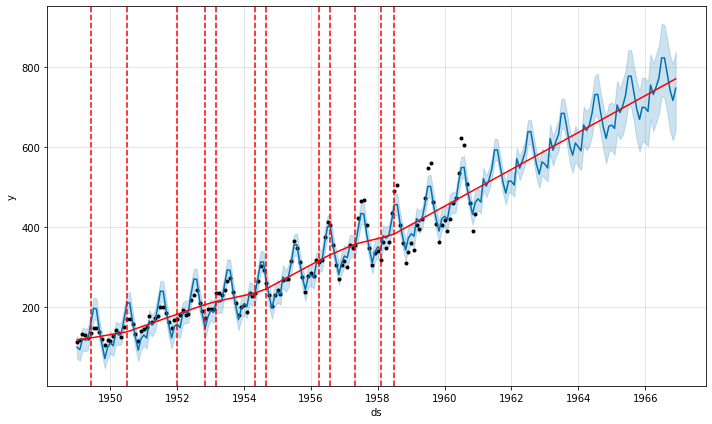

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


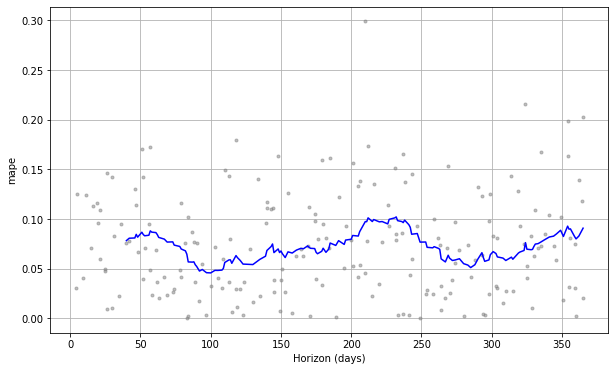

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 8


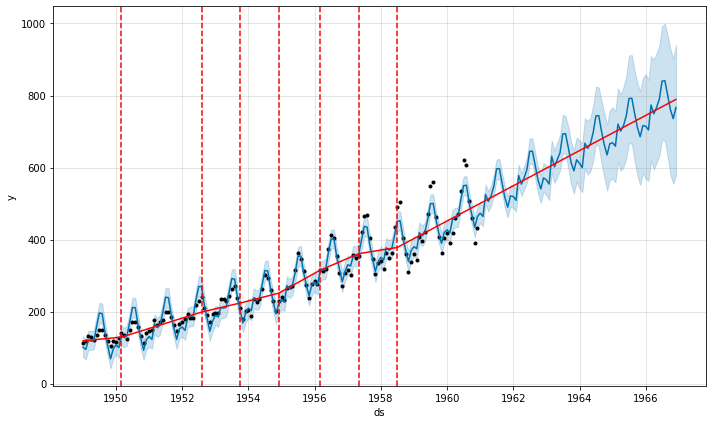

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


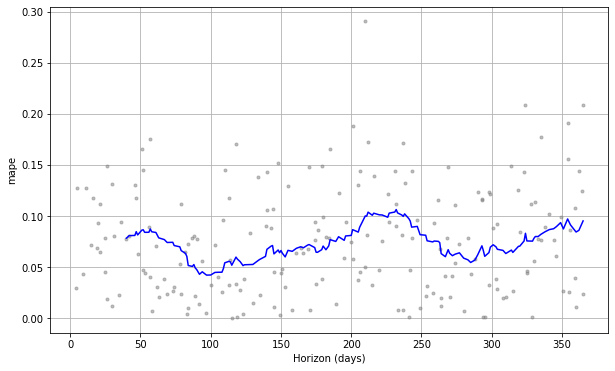

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 10


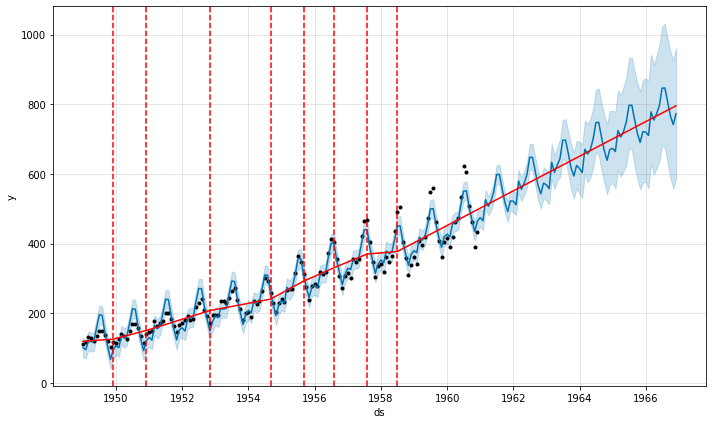

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


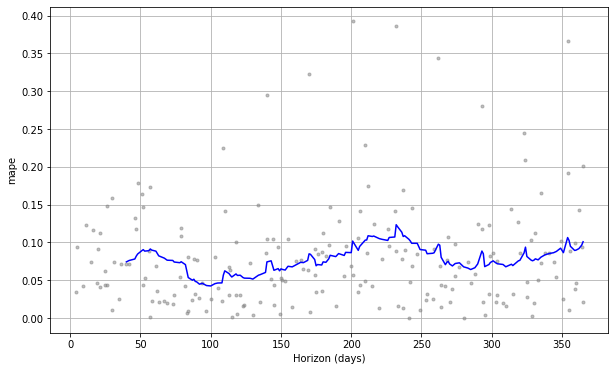

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 15


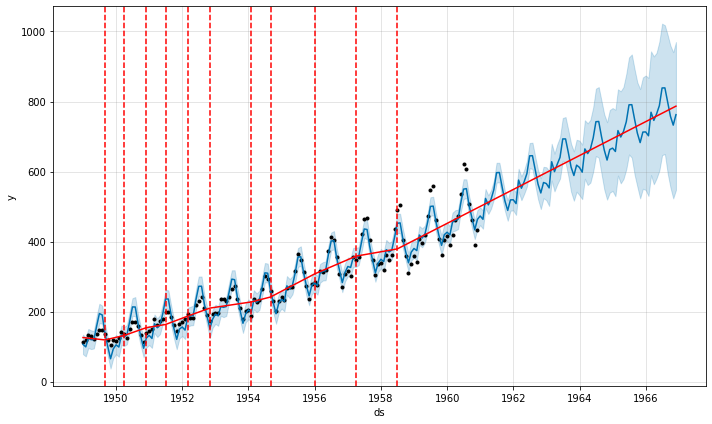

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


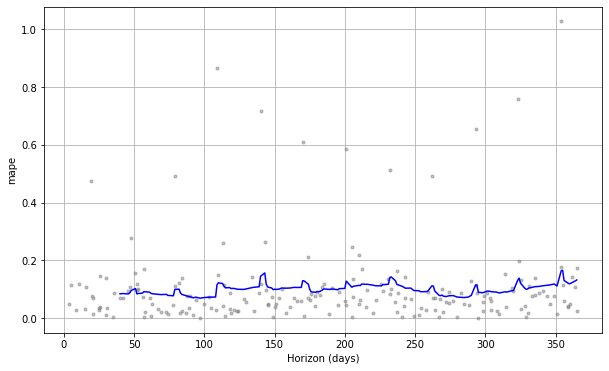

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 20


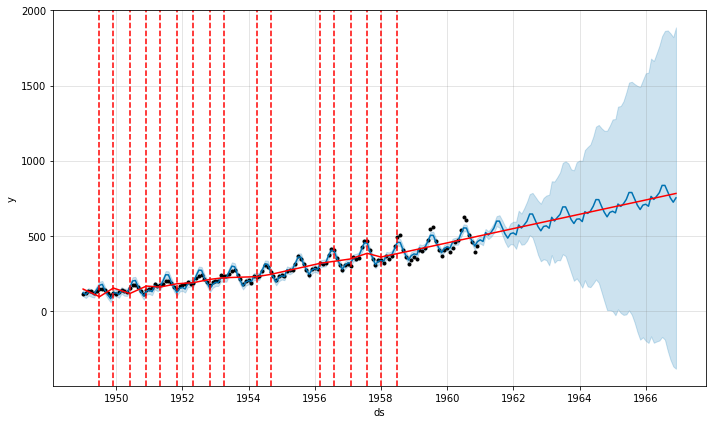

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


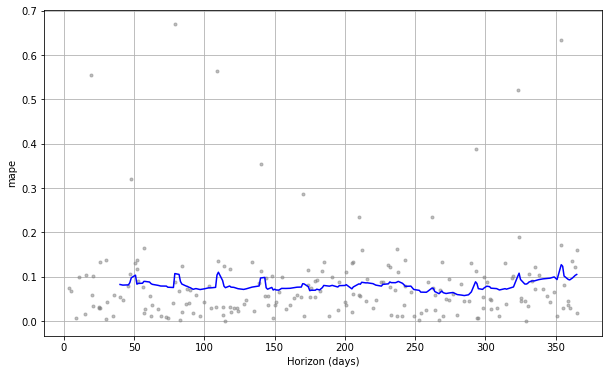

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 25


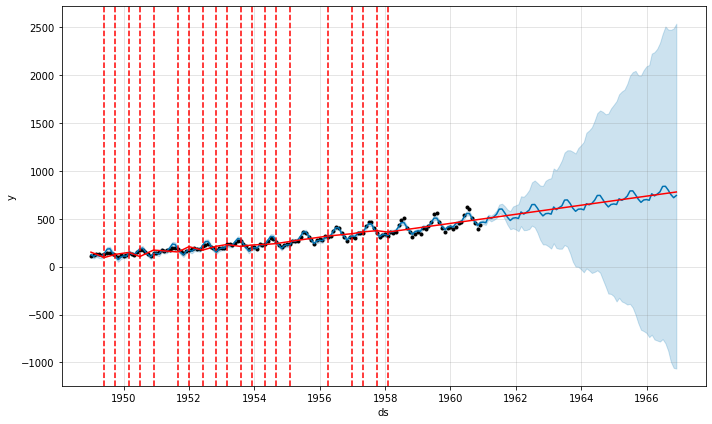

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


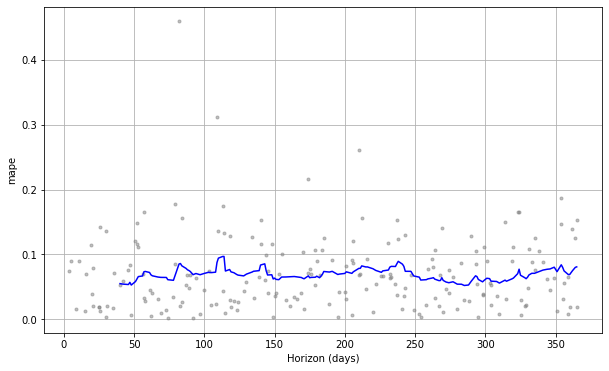

In [22]:
changepoint_prior_scales = [.005, .05, .5, 2]
n_changepoints = [8, 10, 15, 20, 25]

rmse = []
for changepoint_prior_scale in changepoint_prior_scales:
    for n_changepoint in n_changepoints:
        print('Changepoint Prior Scale:', changepoint_prior_scale)
        print('Number Changepoints:', n_changepoint)
        m = Prophet(changepoint_prior_scale=changepoint_prior_scale, n_changepoints=n_changepoint).fit(df)
        future = m.make_future_dataframe(periods=12 * 6, freq='M')
        forecast = m.predict(future)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        plt.show()
        df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon = '365 days')
        df_p = performance_metrics(df_cv)
        rmse.append((df_p['rmse'].mean(), {'changepoint_prior_scale': changepoint_prior_scale, 'n_changepoint': n_changepoint}))
        fig = plot_cross_validation_metric(df_cv, metric='mape')
        plt.show()

In [23]:
rmse

[(28.85725314086818, {'changepoint_prior_scale': 0.005, 'n_changepoint': 8}),
 (28.70719267315669, {'changepoint_prior_scale': 0.005, 'n_changepoint': 10}),
 (28.92022601867766, {'changepoint_prior_scale': 0.005, 'n_changepoint': 15}),
 (28.93082683473705, {'changepoint_prior_scale': 0.005, 'n_changepoint': 20}),
 (29.0719916879086, {'changepoint_prior_scale': 0.005, 'n_changepoint': 25}),
 (28.048565744666522, {'changepoint_prior_scale': 0.05, 'n_changepoint': 8}),
 (28.046301719198024, {'changepoint_prior_scale': 0.05, 'n_changepoint': 10}),
 (28.040530922527015, {'changepoint_prior_scale': 0.05, 'n_changepoint': 15}),
 (28.15721272458056, {'changepoint_prior_scale': 0.05, 'n_changepoint': 20}),
 (28.052389076022965, {'changepoint_prior_scale': 0.05, 'n_changepoint': 25}),
 (29.922737129863677, {'changepoint_prior_scale': 0.5, 'n_changepoint': 8}),
 (29.719357466021005, {'changepoint_prior_scale': 0.5, 'n_changepoint': 10}),
 (29.77912816424081, {'changepoint_prior_scale': 0.5, 'n_ch

In [24]:
#dataframe of annual US Public Holidays over training and forecasting periods 

ny = pd.DataFrame({'holiday': "New Year's Day", 'ds' : pd.to_datetime(['2016-01-01', '2017-01-01'])})  
mlk = pd.DataFrame({'holiday': 'Birthday of Martin Luther King, Jr.', 'ds' : pd.to_datetime(['2016-01-18', '2017-01-16'])}) 
wash = pd.DataFrame({'holiday': "Washington's Birthday", 'ds' : pd.to_datetime(['2016-02-15', '2017-02-20'])})
mem = pd.DataFrame({'holiday': 'Memorial Day', 'ds' : pd.to_datetime(['2016-05-30', '2017-05-29'])})
ind = pd.DataFrame({'holiday': 'Independence Day', 'ds' : pd.to_datetime(['2015-07-04', '2016-07-04', '2017-07-04'])})
lab = pd.DataFrame({'holiday': 'Labor Day', 'ds' : pd.to_datetime(['2015-09-07', '2016-09-05', '2017-09-04'])})
col = pd.DataFrame({'holiday': 'Columbus Day', 'ds' : pd.to_datetime(['2015-10-12', '2016-10-10', '2017-10-09'])})
vet = pd.DataFrame({'holiday': "Veteran's Day", 'ds' : pd.to_datetime(['2015-11-11', '2016-11-11', '2017-11-11'])})
thanks = pd.DataFrame({'holiday': 'Thanksgiving Day', 'ds' : pd.to_datetime(['2015-11-26', '2016-11-24'])})
christ = pd.DataFrame({'holiday': 'Christmas', 'ds' : pd.to_datetime(['2015-12-25', '2016-12-25'])})

holidays = pd.concat([ny, mlk, wash, mem, ind, lab, col, vet, thanks, christ])

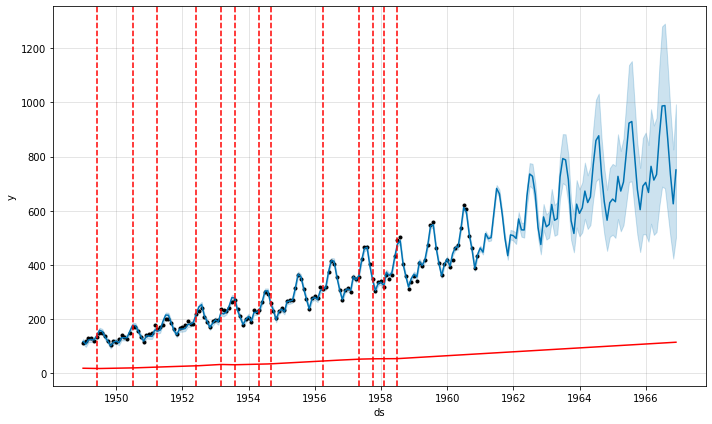

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


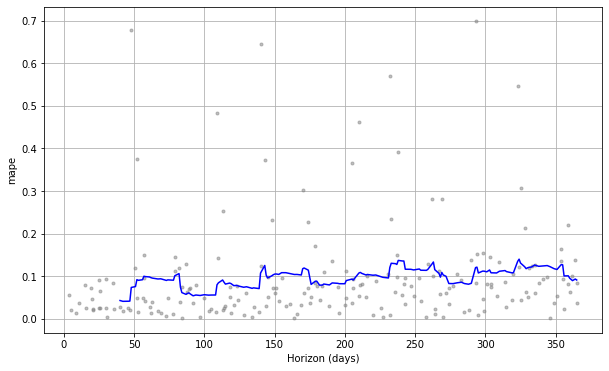

In [25]:
prophet = Prophet(growth='linear',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
#                   holidays=holidays,
                  seasonality_mode='multiplicative',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.05,
                  mcmc_samples=0
                  ).add_seasonality(name='quarterly',
                                    period=365.25 / 4,fourier_order=15
                  )
prophet.fit(df)
future = prophet.make_future_dataframe(periods=12 * 6, freq='M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()